In [7]:
import pickle
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
address='D:/data_mfcc/'
def loadData(id):
    with open(address + f'y_train_{id}','rb') as f:
        y_train=np.array(pickle.load(f))
    with open(address+f'y_test_{id}','rb') as f:
        y_test=np.array(pickle.load(f))
    with open(address+ f'X_train_{id}','rb') as f:
        X_train = np.array(pickle.load(f))
    with open(address+f'X_test_{id}','rb') as f:
        X_test = np.array(pickle.load(f))

    scalers = {}
    for k in range(X_train.shape[2]):
        scalers[k] = StandardScaler()
        X_train[:, k, :] = scalers[k].fit_transform(X_train[:, k, :]) 

    for j in range(X_test.shape[2]):
        X_test[:, j, :] = scalers[j].transform(X_test[:, j, :])
    
    print(f'id : {id}')
    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    y_test = encoder.fit_transform(y_test)

   
    return X_test,y_test



In [3]:
def result(y_pred,y_test,plot=False):
    y_pred_final=[] #getting final answers 
    y_test_final=[]
    for i in range((y_pred.shape[0])):
        y_pred_final.append(np.argmax(y_pred[i]))
        y_test_final.append(np.argmax(y_test[i]))

    y_pred_final_alpha=[]
    y_test_final_alpha=[]


    conf_Mat = confusion_matrix(y_test_final,y_pred_final,labels=[0,1,2,3,4,5])
    norm_conf_Mat = (conf_Mat / conf_Mat.astype(np.float).sum(axis=1))*100
    accuracy = accuracy_score(y_test_final,y_pred_final)
    
    #plot confusion matrix
    #plt.subplot(1,2,1)

    if plot == True:
        norm_df_cm = pd.DataFrame(norm_conf_Mat, index = ['ANG','DIS','FEA','HAP','NEU','SAD'],
                  columns = ['ANG','DIS','FEA','HAP','NEU','SAD'])
        df_cm = pd.DataFrame(conf_Mat, index = ['ANG','DIS','FEA','HAP','NEU','SAD'],
                  columns = ['ANG','DIS','FEA','HAP','NEU','SAD'])
        
    return accuracy,norm_df_cm,df_cm

In [9]:
def plot(df_cm1,id,accuracy_att):
    fig, (ax1) =plt.subplots(1,figsize=(10,5))
    #ax.set_title(id)
    ax1.set_title(f'{id} - accuracy - {accuracy_att*100:.2f}')
    #ax2.set_title(f'Regular {id} - accuracy - {accuracy*100:.2f}')
    sn.heatmap(df_cm1, annot=True,ax=ax1,fmt='g')
    #sn.heatmap(df_cm2, annot=True,ax=ax2,fmt='g')

    

In [5]:
# edit the address to local dir for attention models from fourthmodel.py variable filepath

def AttentionModel(X_test,y_test,id):
    s0_t = np.zeros((X_test.shape[0], hid_post_act))
    c0_t = np.zeros((X_test.shape[0], hid_post_act))
    model = keras.models.load_model(r"C:\Users\djaym7\Desktop\Github\EmotionRecognition\saved_mfcc_atten_unidir_models"+f'/{id}.h5')
    return result(model.predict([X_test,s0_t,c0_t]),y_test,plot=True)
    
    

In [10]:
saveaddr=r"C:\Users\djaym7\Desktop\Github\EmotionRecognition\mfcc_uni_atten_conf_mat/"
total_num_people=[]
for i in range(1,92):
    if i <10:
        total_num_people.append('100'+str(i))
    else:
        total_num_people.append('10'+str(i))
hid_post_act = 96
att_acc=[]
acc=[]
att_df_list=[]
df_list=[]
for i in total_num_people:
    
    X_test,y_test=loadData(i)
    accuracy_att,norm_df_cm1,df_cm1 = AttentionModel(X_test,y_test,i)
    #accuracy,norm_df_cm2,df_cm2= NonAttentionModel(X_test_noscale,y_test,i)
    att_df_list.append(df_cm1)
    #df_list.append(df_cm2)
    att_acc.append(accuracy_att)
    #acc.append(accuracy)
    plot(norm_df_cm1,i,accuracy_att)
    
    #change the address where you would like to save all images or delete the code below if you dont want image output
    plt.savefig(saveaddr + f'{i}.png')
    plt.close('all')
    

id : 1001
id : 1002
id : 1003
id : 1004
id : 1005
id : 1006
id : 1007
id : 1008
id : 1009
id : 1010
id : 1011
id : 1012
id : 1013
id : 1014
id : 1015
id : 1016
id : 1017
id : 1018
id : 1019
id : 1020
id : 1021
id : 1022
id : 1023
id : 1024
id : 1025
id : 1026
id : 1027
id : 1028
id : 1029
id : 1030
id : 1031
id : 1032
id : 1033
id : 1034
id : 1035
id : 1036
id : 1037
id : 1038
id : 1039
id : 1040
id : 1041
id : 1042
id : 1043
id : 1044
id : 1045
id : 1046
id : 1047
id : 1048
id : 1049
id : 1050
id : 1051
id : 1052
id : 1053
id : 1054
id : 1055
id : 1056
id : 1057
id : 1058
id : 1059
id : 1060
id : 1061
id : 1062
id : 1063
id : 1064
id : 1065
id : 1066
id : 1067
id : 1068
id : 1069
id : 1070
id : 1071
id : 1072
id : 1073
id : 1074
id : 1075
id : 1076
id : 1077
id : 1078
id : 1079
id : 1080
id : 1081
id : 1082
id : 1083
id : 1084
id : 1085
id : 1086
id : 1087
id : 1088
id : 1089
id : 1090
id : 1091


In [11]:
df_att = pd.DataFrame().reindex_like(att_df_list[0])
for i in att_df_list:
    df_att=df_att.add(i,fill_value=0)
mean_att_acc = np.array(att_acc).mean()

In [12]:
import pickle
with open(saveaddr + 'accuracies','wb') as f:
    pickle.dump(att_acc,f)
with open(saveaddr + 'df_att','wb') as f:
    pickle.dump(df_att,f)

In [13]:
print(mean_att_acc,'\t')

0.5550964827815491 	


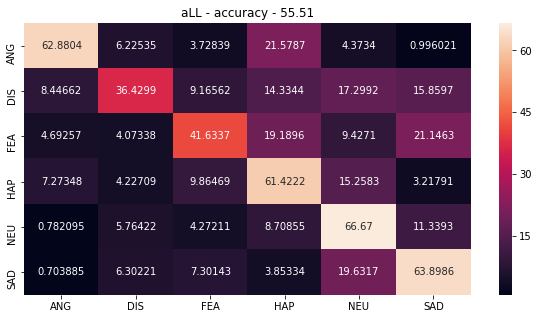

In [16]:
df_att = (df_att / df_att.astype(np.float).sum(axis=1))*100
plot(df_att,id='aLL',accuracy_att=mean_att_acc)
plt.savefig(saveaddr +'all.png')

In [17]:
accuracy = pd.DataFrame(np.array([att_acc]).transpose())

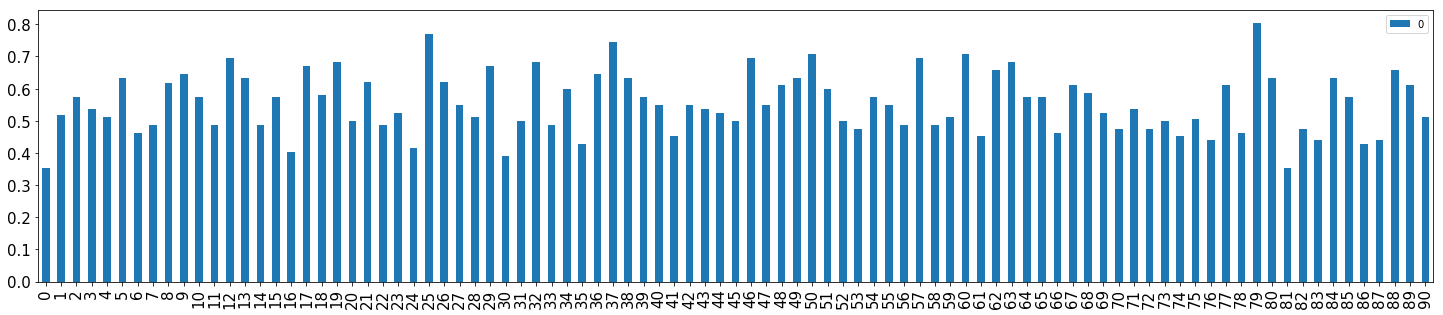

In [18]:
accuracy.plot(figsize=(25,5),fontsize=15,kind='bar')
plt.savefig(saveaddr +'accuracyBarPlot.png')

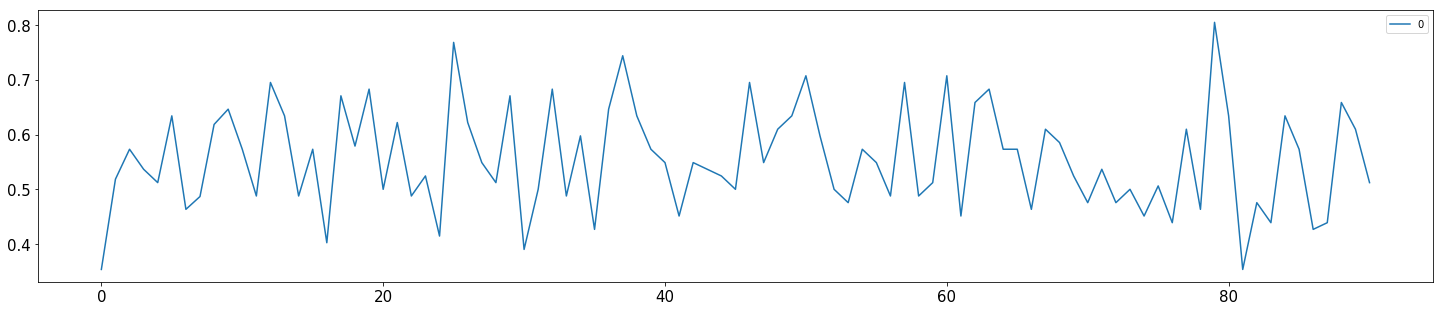

In [19]:
accuracy.plot(figsize=(25,5),fontsize=15)
plt.savefig(saveaddr +'accuracyPlot.png')